# <div align="center"> Work In Progress 👷‍</div>
<div align='center'> This is my first Kaggle competition and is a work in progress. Please comment below if you have any questions or ideas. </div>

# Table of Contents
<a id='table-of-contents'></a>
1. [Overview](#overview)
1. [System Setup](#setup)
1. [Exploratory Data Analysis](#eda)
1. [Preprocessing](#preprocessing)
1. [Training Models](training)
1. [Evaluate -> Tune -> Ensemble](#evaluate)
1. [Conclusion](#conclusion)

<a id="overview"></a>
# <div align='center'>1. Overview
## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

Metric
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)

Survived (contains your binary predictions: 1 for survived, 0 for deceased)

```
PassengerId,Survived
892,0
893,1
894,0
Etc.
```

<a id="setup"></a>
# <div align='center'>2. Setup System Environment

In [638]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [639]:
# Check python system version
import sys
sys.version

'3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 21:08:20) \n[GCC 9.3.0]'

<a id="eda"></a>
# <div align='center'>3. Exploratory Data Analysis
Credits: [Ken Jee](https://www.kaggle.com/kenjee/titanic-project-example), [Emanuele Panizio](https://www.kaggle.com/emanuelepanizio/pytanicnb/notebook), [Ju Liu](https://www.youtube.com/watch?v=fS70iptz-XU&t=2569s]), [Sharlto Cope](https://www.kaggle.com/dwin183287/titanic-machine-learning-from-disaster-eda)

References: [Data](https://www.kaggle.com/c/titanic/data)

Functions to try out:
* create subplots 
* seaborn and plt plots
* sns.barplot
* sns.countplot
* [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
* sns.catplot
* sns.displot
* pivot_table
* plot fares as line and bins

In [640]:
# load the training and test data

train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

In [641]:
# inspect the dataframe
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [642]:
# inspect the dataframe for entries, columns, missing values, and data types

train.info()
print('')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 no

### Observations:
* ML models must have numerical values to compute, there fore categorical datatype `objects` must be converted to numerical values.
* Nan values to address with imputation: `['Age', 'Fare', 'Cabin', 'Embark']`
* Nan values to drop: `['Name']`
* Test dataset has 1 less column: `['Survived']` which is the target or label

In [643]:
# Statistical values for all the numerical categories

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations
* Fare has a wide distribution. Let's dive deeper:
    * Viz - histogram, normalize
    * Pivot table by various categories: Age, Sex, Survived, Pclass
* Create histograms for `['Age', 'SibSp', 'Parch', 'Fare']`to see spread of instances

In [644]:
# list of columns for segmentation

train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [645]:
# split categorical and numerical dataframes for analysis

df_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = train.drop(['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

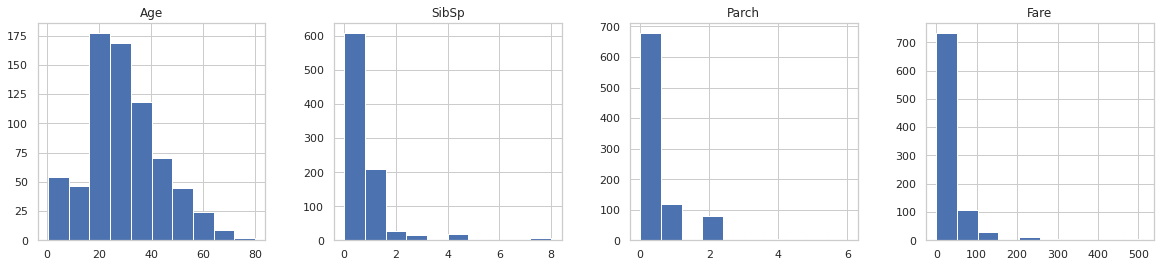

In [646]:
# shapes of quantitative features
train.hist(column=df_num.columns, figsize=(20,4), layout=(1,4))

<AxesSubplot:xlabel='Fare', ylabel='Count'>

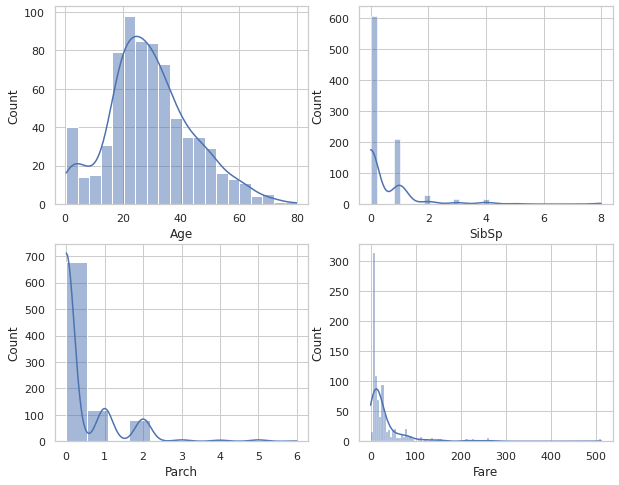

In [647]:
# plot hist with kernal density edstimation to get an average line
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=train, x='Age', kde=True, ax=ax[0,0])
sns.histplot(data=train, x='SibSp', kde=True, ax=ax[0,1])
sns.histplot(data=train, x='Parch', kde=True, ax=ax[1,0])
sns.histplot(data=train, x='Fare', kde=True, ax=ax[1,1])

### Observations:
* Only 'Age' has a somewhat normal distribution. The other values are skewed to the left with longtails to the right. 
    * Does age group affect the survival rate? Bin by age group
    * Most of the population is in their late teens to late 30s.
* Most paid a low fare, many are single with no family
* Should we normalize these values using a logarithmic method?

In [648]:
# Gender breakdown
print(train['Sex'].value_counts())
print()
print(train['Sex'].value_counts(normalize=True)) #Percentage breakdown

male      577
female    314
Name: Sex, dtype: int64

male      0.647587
female    0.352413
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

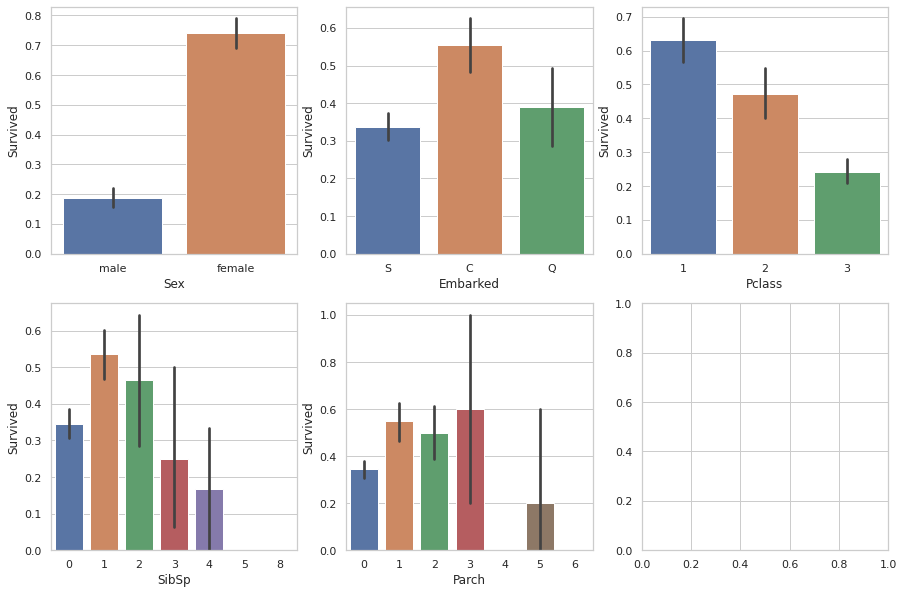

In [649]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
sns.barplot(x='Sex', y='Survived', data=train, ax=ax[0,0])
sns.barplot(x='Embarked', y='Survived', data=train, ax=ax[0,1])
sns.barplot(x='Pclass', y='Survived', data=train, ax=ax[0,2])
sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[1,0])
sns.barplot(x='Parch', y='Survived', data=train, ax=ax[1,1])
# sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[1,2])

### Observations:
* Many more females survived
* People who embarked from Cherbourg had higher survival rate. Let's explore this further?
* First and second class passangers survived better. Due to location of cabins?
* Smaller families had higher survival rates,best if you had 1 or 2 other people in your family.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

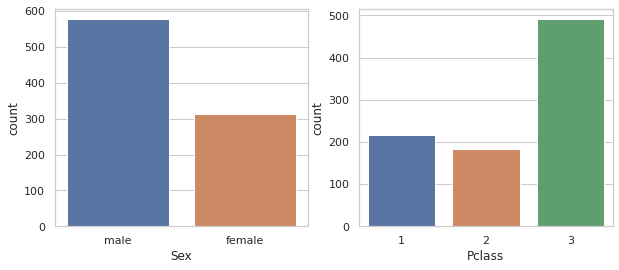

In [650]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='Sex', data=train, ax=ax[0])
sns.countplot(x='Pclass', data=train, ax=ax[1])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

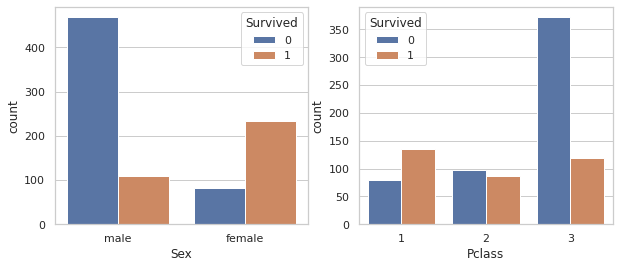

In [651]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='Sex', data=train, hue='Survived', ax=ax[0])
sns.countplot(x='Pclass', data=train, hue='Survived', ax=ax[1])

### Observations:
* People were more chivalrous back in then? Or women were better able to negotiate their way on to life boats? Maybe they were with their children?
* 

In [652]:
columns = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
for column in columns:
    print(pd.pivot_table(train, index='Survived', columns=column, values='Name', aggfunc='count'))
    print()

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN



In [653]:
# Analysis of SES - Pclass survival rates, counts, and averages

print('Socio Economic Class - Count')
print(train.groupby(['Pclass']).count())
print()
print('Socio Economic Class - Mean')
print(train.groupby(['Pclass']).mean())

Socio Economic Class - Count
        Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass                                                                       
1            216   216  216  186    216    216     216   216    176       214
2            184   184  184  173    184    184     184   184     16       184
3            491   491  491  355    491    491     491   491     12       491

Socio Economic Class - Mean
        Survived        Age     SibSp     Parch       Fare
Pclass                                                    
1       0.629630  38.233441  0.416667  0.356481  84.154687
2       0.472826  29.877630  0.402174  0.380435  20.662183
3       0.242363  25.140620  0.615071  0.393075  13.675550


In [654]:
print('Value Counts')
print(pd.pivot_table(train, index='Pclass', columns='Embarked', values='Name', aggfunc='count'))
print('')
print('Average Fare Amount')
print(pd.pivot_table(train, index='Pclass', columns='Embarked', values='Fare', aggfunc='median'))

Value Counts
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353

Average Fare Amount
Embarked        C      Q      S
Pclass                         
1         78.2667  90.00  52.00
2         24.0000  12.35  13.50
3          7.8958   7.75   8.05


Text(0.5, 1.0, 'Age Distribution Boxplot By Embarkement')

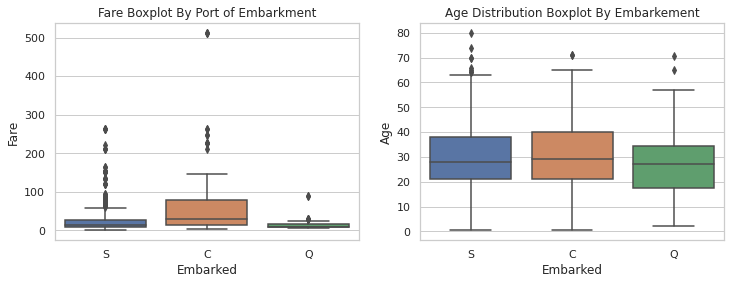

In [655]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='Embarked', y='Fare', data=train, ax=ax[0])
sns.boxplot(x='Embarked', y='Age', data=train, ax=ax[1])
# sns.boxplot(x='Embarked', y='Age', hue='Sex', data=train, ax=ax[2])

ax[0].set_title('Fare Boxplot By Port of Embarkment')
ax[1].set_title('Age Distribution Boxplot By Embarkement')

### Observations:
* People from Cherbourg, France are able to pay more money for fare, and support the hypothesis that wealther passengers had a higher chance of survival. 
* Major outliers for Cherbourg dataset 
* Wealth matters. Please from 1st class had higher rates of survival, and more people survived rather than drowned compared to the other classes. 
* You have a higher chance of surviving if you're solo or have 1 family member with you compared to a large family. Maybe it was difficult to choose which family member would survive? Or maybe it was more expensive to have a 1st class cabin and better location to boats?



In [ ]:
sns.scatterplot(data=train, x='Age', y="Fare")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

In [ ]:
cut_labels = ['>10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
# cut_bins = [0, 70000, 100000, 130000, 200000]
cut_df = train
cut_df['cut_age'] = pd.cut(cut_df['Age'], bins=8, labels=cut_labels)
age_bin_df = cut_df.groupby(['cut_age']).sum()
print(type(age_bin_df))
age_bin_df

In [ ]:
train = train.drop(columns=['cut_age'])

In [ ]:
g = sns.countplot(data=cut_df, x='cut_age', hue='Survived')
g.set_title('Surviors by Age')

### Observations:
* Survival based on age followed a somewhat normal distribution with a tail to the right with older people.
* Young children and infants survived more than died. Probably the mentality of women and children to be saved first. 
* High rates of survival for people in their 30s, 40s and 50s. 


# <div align='center'>Outliers Analysis
* Fare
* Sibsp
    * Ticket numbering
* Age

In [ ]:
def boxplt(column):
    sns.set_theme(style='whitegrid')
    g = sns.boxplot(x=train[column])
    g.set_title(f"{column} Outlier Boxplot")
    return g 

## Fare Outlier Analysis

In [ ]:
boxplt('Fare')

In [ ]:
train.loc[train['Fare'] > 500]

### Findings:
These outliers paid the princely sum of 512 pounds. In today's pound it would be worth a staggering **58,864 pounds**! (Note: each group had both the same ticket number and fare paid). This was by far the most out of any of the guests. Part of the same group lead by the wealthy Mr. Cardeza - Miss. Ward the maid, and Mr. Lesurer the manservant. They were on their way back to the USA by way of Cherbourg, France. 
* All similar age
* Multiple cabins but interestly all on the 'B' deck. **Could this be the best deck on the ship? We should analyze deck levels for our model.**
* **Feature: Cherbourg was the best place to leave if you wanted to survive. We will add this to our list of features for the ML models.**
* **Feature: Maybe is there a correlations between 'PC' tickets and survival rate?**

To learn more about this group visit this biography of [Miss. Anna Ward](https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html)

### Ticket Number Analysis

In [ ]:
# The outliers had similar ticket number structures with 'PC'. We find that all tickets with 'PC' had a 65% of survival. 

ticket_pc_df = train[train['Ticket'].str.match("PC")]
print(ticket_pc_df.describe())

In [ ]:
# Inspect 1st class ticket structure

pclass_df = train.loc[train['Pclass'] == 1]
pclass_df.groupby(['Ticket']).mean()

In [ ]:
# Inspect patterns for tickets with Letters in 1st class who survived - 'PC' in all but one

tickets_df = train.loc[train.Ticket.str.contains('[A-Za-z]')]
tickets_df2 = train.copy()
tickets_df.loc[train.Pclass == 1].loc[train.Survived == 1]
tickets_df2['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
tickets_df2
pd.pivot_table(tickets_df2, index='Survived', columns='numeric_ticket', values='Name', aggfunc='count')

In [ ]:
# Simply just having any letter in the 'Ticket' would not help your chance of survival.

tickets_df = train.loc[train.Ticket.str.contains('[A-Za-z]')]
tickets_df.describe()

In [ ]:
# Analyze tickets with the letters 'P', 'C', or 'A'
# Again, we find that 'P' has the highest rate in these numbers for survival but lower than 'PC'

letters = ['P', 'C', 'A']
for letter in letters:
    letter_df = train.loc[train.Ticket.str.contains(letter)]
    percent = letter_df.Survived.mean()
    count = letter_df.Survived.count()
    print(f'Letter {letter}: {round(percent*100, 1)}% survival rate out of {count} tickets')

## Findings:
Tickets with the letter `'PC'` had a **65% survival rate**. Because of this, we should add this as a feature to our model.

## Sibling or Spouse Outlier Analysis

In [ ]:
boxplt('SibSp')

In [ ]:
# We see that the outliers came from 2 families

family_df = train.loc[train['SibSp'] > 4]
family_df.sort_values('Name')

In [ ]:
# The Goodwin family of 6

train.loc[train['Ticket'] == 'CA 2144']

In [ ]:
# The Sage family of 7

train.loc[train['Ticket'] == 'CA. 2343']

## Family Size Outlier Findings:
Unforetunately, the Goodwin and Sage families - who had 5 or more members - did not fare well. They all perished. Maybe it's because of their socio economic status. Maybe it's because there was just too many of them to quickly escape to a life boat. Or maybe it's because of their cabin placement. Having a large family was tragic in the Titanic.

**Can we bin people by family or not? Maybe people had a higher survival rate if they had fewer family members?**

In [ ]:
# Survival rates for group size.

train.groupby(['SibSp'])['Survived'].mean()

## Age Outlier Analysis

In [ ]:
boxplt('Age')

In [ ]:
# Inspect passengers Ages 65 and up

age_df = train.loc[train['Age'] > 64]
age_df.sort_values('Age', ascending=False)

## Age Outlier Findings:
While it doesn't bode well to be elderly on the Titanic, the eldest person actually survived! He actually was able to buoy himself on his briefcase and a fur coat until he found an overturned lifeboat. To learn more visit the biography of [Mr. Algernon Barkworth](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html).

## Title Analysis
Here I will look if the title of the passenger had any correlation to surving the Titantic - e.g. Mr., Mrs., etc.

In [ ]:
title_df = train.copy()
title_df['title'] = train.Name.apply(lambda x: x.split(',')[1].split(' ')[1].strip())
title_df['title'].value_counts()
pd.pivot_table(title_df, index='Survived', columns='title', values='Name', aggfunc='count')

In [ ]:
title_df2 = title_df.groupby(['title']).mean().reset_index(inplace=False)
title_df2 = title_df2.sort_values('Survived', ascending=False)
g = sns.barplot(x='title', y='Survived', data=title_df2)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
g = sns.barplot(x='title', y='Survived', data=title_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Title Findings:
* Titles were a fairly good predictor if you survived the Titanic
* Female titles faired very well

<a id="preprocessing"></a>
# <div align='center'>4. Preprocessing Data
    
The training and test datasets don't have the same attributes after feature engineering. Therefore, I had to be careful about choosing with features to leave in the datasets.
    
## Feature engineer:
* **Ticket lettering** - with 'P' have a 58% chance of survival -> **refer to above code**
* **Pclass** Include 1st and 2nd class. Drop 3rd class?
* **Age immputation** for continuous data - use mean/median `fillna()`
* **Fare and Age scaling/normalization** for ML optimization. Gaussian calculations do not like large variance in values: [article1](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/), [article2](https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler)
* **Family size SibSp** binning two groups of 1-3, >3
* **Name title segregation** - split/strip titles out names: [source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)
* **One Hot Encoding** - categorial data must me turned into numerical with [One Hot Encoding or Get Dummies](https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970)

In [ ]:
test.info()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

# cabin - will we do this feature??

# name titles
train['title'] = train.Name.apply(lambda x: x.split(',')[1].split(' ')[1].strip())
test['title'] = test.Name.apply(lambda x: x.split(',')[1].split(' ')[1].strip())

# age and fare imputation w/ median to acccount for outliers
# scale
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(test.Age.median())
test.Fare = test.Fare.fillna(test.Fare.mean())

# created dummy variables from categories (also can use OneHotEncoder)
# sex, embarked, pclass, title get dummies
train = pd.get_dummies(train, columns=['Sex', 'Pclass', 'Embarked', 'title', 'SibSp', 'Parch'])
test = pd.get_dummies(test, columns=['Sex', 'Pclass', 'Embarked', 'title', 'SibSp', 'Parch'])

# numeric tickets
# tickets with 'PC'
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['pc_ticket'] = train['Ticket'].str.match("PC").apply(lambda x: 1 if True else 0)
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['pc_ticket'] = test['Ticket'].str.match("PC").apply(lambda x: 1 if True else 0)

# age normalized
train['age_norm'] = scaler.fit_transform(train[['Age']])
test['age_norm'] = scaler.fit_transform(test[['Age']])

# fare normalized
train['fare_norm'] = scaler.fit_transform(train[['Fare']])
test['fare_norm'] = scaler.fit_transform(test[['Fare']])

## Create the X_train, X_test, and y_train Datasets

In [ ]:
# Create the training and test datasets
X_train = train.drop(columns=['Survived', 'Fare', 'Name', 'Age', 'Ticket', 'Cabin', 'title_Mme.', 'title_the', 'title_Sir.', 'title_Mlle.', 'title_Major.', 'title_Lady.', 'title_Jonkheer.', 'title_Don.', 'title_Capt.'])
X_test = test.drop(columns=['Fare', 'Name', 'Age', 'Ticket', 'Cabin', 'title_Dona.', 'Parch_9'])
y_train = train['Survived']
print(f'y_train.shape: {y_train.shape}')
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print('X_train Columns:', X_train.columns)
print('X_test Columns:', X_test.columns)

In [ ]:
# inspect the X_train dataset
X_train.head(3)

In [ ]:
X_test.fare_norm.fillna(X_test.fare_norm.mean())

In [ ]:
test.info()

In [ ]:
X_test.info()

<a id="Training"></a>
# <div align='center'>5. Train Model
👷‍WIP👷‍

* Random Forest
* Regression
* K Nearest Neighbor
* Decision Tree (to be graphed)
``` 
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
```

In [ ]:
X_train

## Decision Tree Classifier

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print(f'Train data score: {clf.score(X_train, y_train)}')
# print(f'Test data score: {clf.score(X_test, y_test)}')

<a id="evaluate"></a>
# <div align='center'>6. Evaluate -> Tune -> Ensemble
👷‍WIP👷‍
* [gridsearch](https://scikit-learn.org/stable/modules/grid_search.html)
* [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* ensembles - hard and soft voting: [sklearn ensemble overview](https://scikit-learn.org/stable/modules/ensemble.html), [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

<a id="conclusion"></a>
# <div align='center'>7. Conclusion
👷‍WIP👷‍
* Write up
* Submissions with different names

In [ ]:
y_hat = clf.predict(X_test)
y_hat
# now you must concat this to results df and submit

In [ ]:
# prepare submission
submission_tree = pd.DataFrame({'PassengerID': X_test.index, 'Survived': y_hat})
submission_tree.to_csv('my_submission.csv', index=False)
submission_tree